<a href="https://colab.research.google.com/github/tranhuuan1703/TTTN_Image_Segmentation/blob/main/Model_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [ ]:
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Read data

In [ ]:
with open('/content/drive/MyDrive/Segmentation/segmentation_brain/train/_annotations.coco.json','r') as file:
    data = json.load(file)

# for img in data['images'][:10]:
#     print(img['file_name'])

In [ ]:
# data['categories']

In [ ]:
#To see the structure of the json file
def print_structure (d, indent=0):
    if isinstance(d,dict):
        for key , value in d.items():
            print(' ' * indent + str(key))
            print_structure(value,indent+1)
    elif isinstance(d, list):
        print(' ' * indent + "list of length {} containing : ".format(len(d)))
        if d:
            print_structure(d[0],indent+1) # only print the structure of the first item

with open('/content/drive/MyDrive/Segmentation/segmentation_brain/train/_annotations.coco.json','r') as file:
    data = json.load(file)

In [ ]:
#the structure of json data
# print_structure(data)

# Data visualization

In [ ]:
#IMPORTS
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import numpy as np
import os
import random

In [ ]:
def display_masks(image_names, data):
    fig , ax = plt.subplots(2,2,figsize = (15,15))
    for i, img_path in enumerate(image_names):
        draw_image = cv2.imread(img_path)
        img_filename = os.path.basename(img_path)
        img_id = [item for item in data['images'] if item['file_name'] == img_filename][0]['id']
        img_annotations = [ann for ann in data['annotations'] if ann['image_id'] == img_id]
        points_list = img_annotations[0]['segmentation']
        points = np.array(points_list, np.int32)
        points = points.reshape((-1,1,2))
        # Draw polygon
        cv2.polylines(draw_image,[points],True,(0,0,255),3)

        # Display the image
        ax[i//2, i%2].imshow(cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB))
        ax[i//2, i%2].axis('off')
    plt.show()

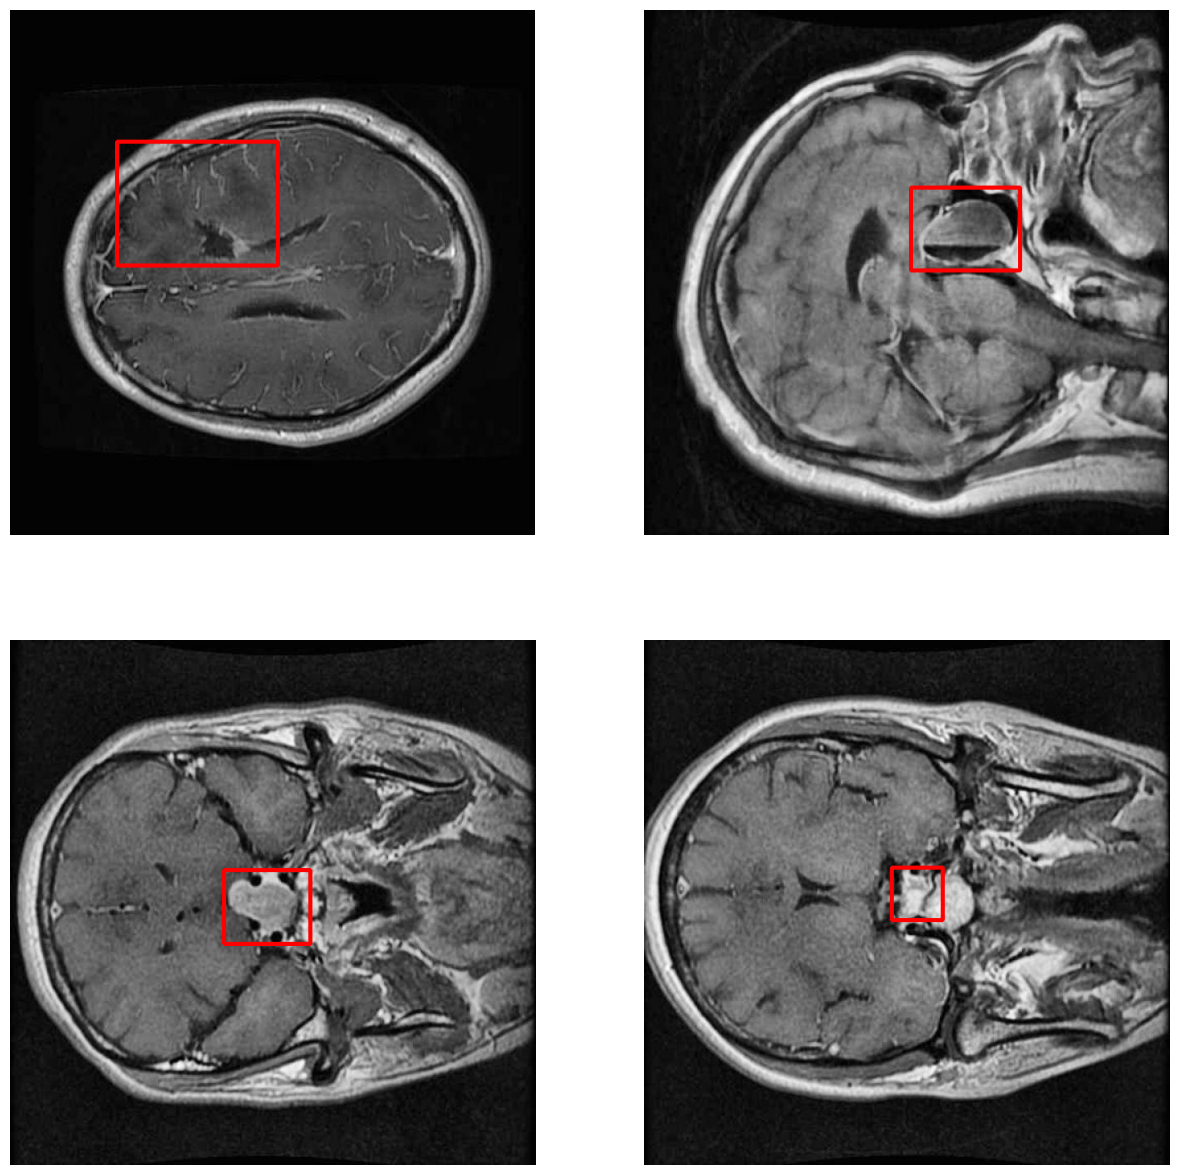

In [ ]:
#Loading the data for visualization part
with open('/content/drive/MyDrive/Segmentation/segmentation_brain/train/_annotations.coco.json','r') as file:
    annotations = json.load(file)
#get all the image files
imge_dir = "/content/drive/MyDrive/Segmentation/segmentation_brain/train"
all_image_files = [os.path.join(imge_dir,img['file_name']) for img in annotations['images']]
random_image_files = random.sample(all_image_files,4)
#call the draw mask function
display_masks(random_image_files,annotations)

In [ ]:
#Function to create binary mask out from the json format
import json
import numpy as np
import skimage.draw
import tifffile
import os
import shutil
import matplotlib.pyplot as plt

def create_mask(image_info, annotations, output_folder, max_print=3):
    # Create an empty mask as a numpy array
    mask_np = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)
    object_number = 1
    printed_masks = 0  # Counter for the number of printed masks
    for ann in annotations:
        if ann['image_id'] == image_info['id']:
            for seg_idx, seg in enumerate(ann['segmentation']):
                rr, cc = skimage.draw.polygon(seg[1::2], seg[0::2], mask_np.shape)
                # Create a mask for each segmentation
                seg_mask = np.zeros_like(mask_np, dtype=np.uint8)
                seg_mask[rr, cc] = 255  # Set the pixel values to 255 for the polygon
                mask_path = os.path.join(output_folder, f"{image_info['file_name'].replace('.jpg', '')}_seg_{seg_idx}.tif")
                tifffile.imwrite(mask_path, seg_mask)
                printed_masks += 1
                if printed_masks >= max_print:
                    return  # Exit the function if maximum number of masks to print is reached

In [ ]:
def main(json_file, mask_output_folder, image_output_folder, original_image_dir):
    # Load COCO JSON annotations
    with open(json_file, 'r') as f:
        data = json.load(f)

    images = data['images']
    annotations = data['annotations']

    # Ensure the output directories exist
    if not os.path.exists(mask_output_folder):
        os.makedirs(mask_output_folder)
    if not os.path.exists(image_output_folder):
        os.makedirs(image_output_folder)

    for img in images:
        # Create the masks
        create_mask(img, annotations, mask_output_folder)
        # Copy original images to the specified folder
        original_image_path = os.path.join(original_image_dir, img['file_name'])
        new_image_path = os.path.join(image_output_folder, os.path.basename(original_image_path))
        shutil.copy2(original_image_path, new_image_path)

In [ ]:
# original_image_dir = '/content/drive/MyDrive/Segmentation/segmentation_brain/test'  # Where your original images are stored
# json_file = '/content/drive/MyDrive/Segmentation/segmentation_brain/test/_annotations.coco.json'
# mask_output_folder = '/content/drive/MyDrive/Segmentation/segmentation_brain_data/test2/masks'  # Modify this as needed. Using val2 so my data is not overwritten
# image_output_folder = '/content/drive/MyDrive/Segmentation/segmentation_brain_data/test2/images'  #
# main(json_file, mask_output_folder, image_output_folder, original_image_dir)

# original_image_dir = '/content/drive/MyDrive/Segmentation/segmentation_brain/train'  # Where your original images are stored
# json_file = '/content/drive/MyDrive/Segmentation/segmentation_brain/train/_annotations.coco.json'
# mask_output_folder = '/content/drive/MyDrive/Segmentation/segmentation_brain_data/train2/masks'  # Modify this as needed. Using val2 so my data is not overwritten
# image_output_folder = '/content/drive/MyDrive/Segmentation/segmentation_brain_data/train2/images'  #
# main(json_file, mask_output_folder, image_output_folder, original_image_dir)

# original_image_dir = '/content/drive/MyDrive/Segmentation/segmentation_brain/valid'  # Where your original images are stored
# json_file = '/content/drive/MyDrive/Segmentation/segmentation_brain/valid/_annotations.coco.json'
# mask_output_folder = '/content/drive/MyDrive/Segmentation/segmentation_brain_data/valid2/masks'  # Modify this as needed. Using val2 so my data is not overwritten
# image_output_folder = '/content/drive/MyDrive/Segmentation/segmentation_brain_data/valid2/images'  #
# main(json_file, mask_output_folder, image_output_folder, original_image_dir)

In [ ]:
def compare_folders_and_delete(folder1_path, folder2_path):
    folder1_items = os.listdir(folder1_path)
    folder2_items = os.listdir(folder2_path)

    for item1 in folder1_items:
        found = False
        for item2 in folder2_items:
            if item1[:4] == item2[:4]:
                found = True
                break
        if not found:
            print(f"Corresponding item for {item1} not found.")
            item1_path = os.path.join(folder1_path, item1)
            os.remove(item1_path)
            print(f"Deleted {item1}")

    for item2 in folder2_items:
        found = False
        for item1 in folder1_items:
            if item2[:4] == item1[:4]:
                found = True
                break
        if not found:
            print(f"Corresponding item for {item2} not found.")
            item2_path = os.path.join(folder2_path, item2)
            os.remove(item2_path)
            print(f"Deleted {item2}")

# Example usage:
folder1_path = "/content/drive/MyDrive/Segmentation/segmentation_brain_data/train2/images"
folder2_path = "/content/drive/MyDrive/Segmentation/segmentation_brain_data/train2/masks"
compare_folders_and_delete(folder1_path, folder2_path)

In [ ]:
# path_mask = "/content/drive/MyDrive/Segmentation/segmentation_brain_data/train2/masks/1000_jpg.rf.1c16148495900a466a53f121ec6af0a9_seg_0.tif"

# img = cv2.imread(path_mask)

In [ ]:
# plt.imshow(img)

# dataset custom

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image

class CustomDataset_general(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_folder = os.path.join(root_dir, "images")
        self.mask_folder = os.path.join(root_dir, "masks")
        self.image_files = sorted(os.listdir(self.image_folder))
        self.mask_files = sorted(os.listdir(self.mask_folder))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Read image
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert("RGB")
        image_gray = image.convert("L")  # Convert to grayscale

        # Read corresponding mask
        mask_name = self.mask_files[idx]
        mask_path = os.path.join(self.mask_folder, mask_name)
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            # Apply transformations
            image_gray = self.transform(image_gray)
            mask = self.transform(mask)

        return image_gray, mask

In [ ]:
# Define transformations
image_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229]),  # Assuming grayscale images
    transforms.Lambda(lambda x: x.clamp(0, 1))
])


# Building model

In [ ]:
! pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

In [ ]:
import torch
from torchvision import datasets
from torch.utils.data import Dataset ,DataLoader
from torchvision.transforms import ToTensor
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.optim import lr_scheduler
import segmentation_models_pytorch as smp

In [ ]:
def train_one_epoch(dataloader, dataval, model,loss_fn ,optimizer):
    batch_size = 32
    model.train()
    track_loss = 0
    num_correct = 0



    for i ,(image,labels) in enumerate(dataloader):
        imgs  = image.to(DEVICE)
        labels = labels.to(DEVICE)

        pred = model(imgs)

        #computing the loss for the function
        loss = loss_fn(pred , labels)
        track_loss+=loss.item()



        # running_loss = round(track_loss/(i+(imgs.shape[0]/batch_size)),2)


        #backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        # if i%100==0:
        #     print("Batch:", i+1, "/",len(dataloader), "Running Loss:",running_loss)

    #     print("--------------------------------------------------")
    track_loss_val = 0
    for i, (image, labels) in enumerate(dataval):
        imgs = image.to(DEVICE)
        labels = labels.to(DEVICE)

        pred = model(imgs)

        #computing the loss for the function
        loss = loss_fn(pred, labels)
        track_loss_val += loss.item()



    print("Batch: {} || Loss train: {} || Loss Vaild: {}".format(i+1, track_loss, track_loss_val))

    return track_loss, track_loss_val

In [ ]:
root_dir = "/content/drive/MyDrive/Segmentation/segmentation_brain_data/valid2"
root_dir = "/content/drive/MyDrive/Segmentation/segmentation_brain_data/train2"


# Create data loaders
dataset_train = CustomDataset_general(root_dir, image_transform)
train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)

dataset_val = CustomDataset_general(root_dir, transform=image_transform)
valid_loader = DataLoader(dataset_val, batch_size=32, shuffle=False)

In [ ]:
# defind GPU to training model
DEVICE = 'cuda'

## Model UNet

In [ ]:
ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'


ACTIVATION = None
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION,
)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]


In [ ]:
#Defining the loss function -- with optimizer
model=model.to(DEVICE)
loss_fn= nn.BCEWithLogitsLoss()
lr=0.0001
optimizer=torch.optim.Adam(params=model.parameters(), lr=lr)
n_epochs = 100

loss_trains = []
loss_vals = []
for i in range(n_epochs):
    print("Epoch No:",i+1)
    loss_train, loss_val=train_one_epoch(train_loader, valid_loader, model,loss_fn,optimizer)
    loss_trains.append(loss_train)
    loss_vals.append(loss_val)
    print("--------------------------------------------------")

Epoch No: 1
Batch: 47 || Loss train: 29.70394828915596 || Loss Vaild: 21.889083862304688
--------------------------------------------------
Epoch No: 2
Batch: 47 || Loss train: 19.01489081978798 || Loss Vaild: 17.306871443986893
--------------------------------------------------
Epoch No: 3
Batch: 47 || Loss train: 15.800079494714737 || Loss Vaild: 14.737792700529099
--------------------------------------------------
Epoch No: 4
Batch: 47 || Loss train: 13.240174263715744 || Loss Vaild: 12.356487721204758
--------------------------------------------------
Epoch No: 5
Batch: 47 || Loss train: 11.188302293419838 || Loss Vaild: 10.57202684879303
--------------------------------------------------
Epoch No: 6
Batch: 47 || Loss train: 9.506989195942879 || Loss Vaild: 9.068873390555382
--------------------------------------------------
Epoch No: 7
Batch: 47 || Loss train: 8.181777074933052 || Loss Vaild: 7.908393204212189
--------------------------------------------------
Epoch No: 8
Batch: 4

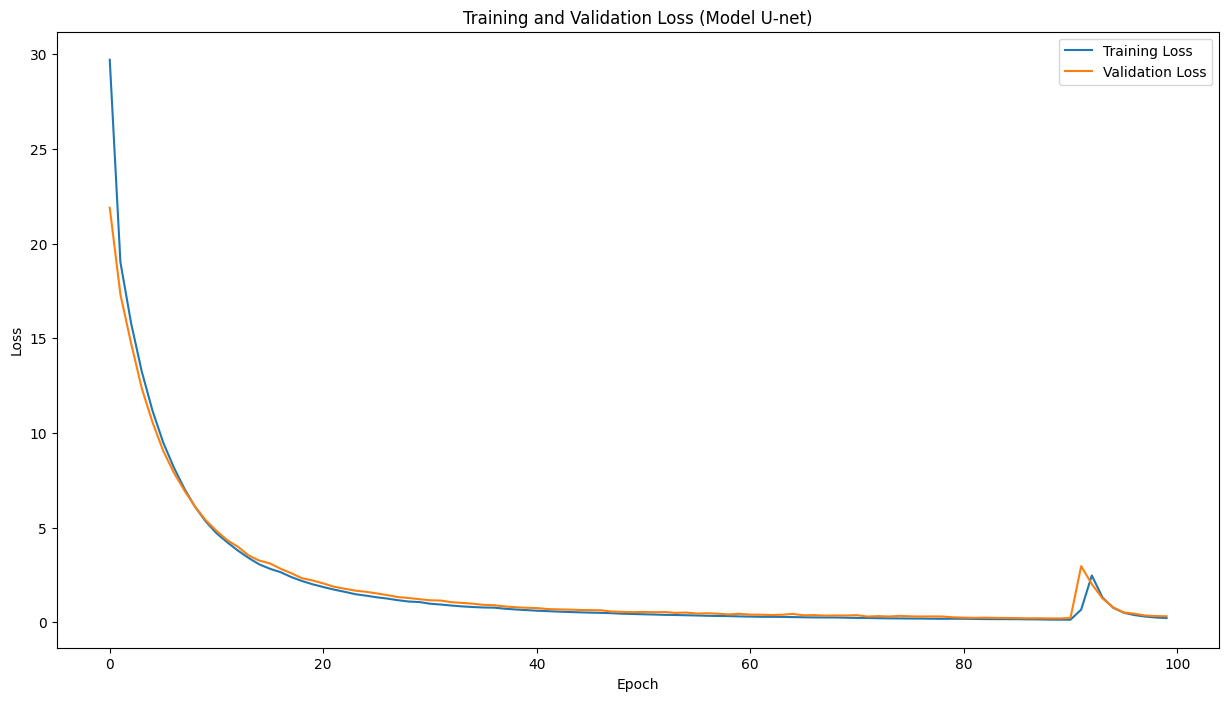

In [ ]:
# torch.save(model.state_dict(), "/content/drive/MyDrive/Segmentation/your_model_path.pt")
fig = plt.figure(figsize=(15, 8))

plt.plot(loss_trains, label='Training Loss')
plt.plot(loss_vals, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Model U-net)')
plt.legend()

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/Segmentation/your_model_u_net.pt")

## Model UNet Plus Plus

In [ ]:
ENCODER = 'mobilenet_v2'
ENCODER_WEIGHTS = 'imagenet'


ACTIVATION = None
model_2 = smp.UnetPlusPlus(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION,
)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 177MB/s]


In [ ]:
#Defining the loss function -- with optimizer
model_2=model_2.to(DEVICE)
loss_fn= nn.BCEWithLogitsLoss()
lr=0.001
optimizer=torch.optim.Adam(params=model_2.parameters(), lr=lr)
n_epochs = 100

loss_trains = []
loss_vals = []
for i in range(n_epochs):
    print("Epoch No:",i+1)
    loss_train, loss_val=train_one_epoch(train_loader, valid_loader, model_2,loss_fn,optimizer)
    loss_trains.append(loss_train)
    loss_vals.append(loss_val)
    print("--------------------------------------------------")

Epoch No: 1
Batch: 47 || Loss train: 13.471246629953384 || Loss Vaild: 6.10313431173563
--------------------------------------------------
Epoch No: 2
Batch: 47 || Loss train: 4.495854631066322 || Loss Vaild: 4.142189495265484
--------------------------------------------------
Epoch No: 3
Batch: 47 || Loss train: 3.192239984869957 || Loss Vaild: 3.0910756811499596
--------------------------------------------------
Epoch No: 4
Batch: 47 || Loss train: 2.636306133121252 || Loss Vaild: 2.6485450863838196
--------------------------------------------------
Epoch No: 5
Batch: 47 || Loss train: 2.131805893033743 || Loss Vaild: 2.3224841579794884
--------------------------------------------------
Epoch No: 6
Batch: 47 || Loss train: 1.8373310007154942 || Loss Vaild: 2.1637878473848104
--------------------------------------------------
Epoch No: 7
Batch: 47 || Loss train: 1.6900859102606773 || Loss Vaild: 1.874354524537921
--------------------------------------------------
Epoch No: 8
Batch: 47

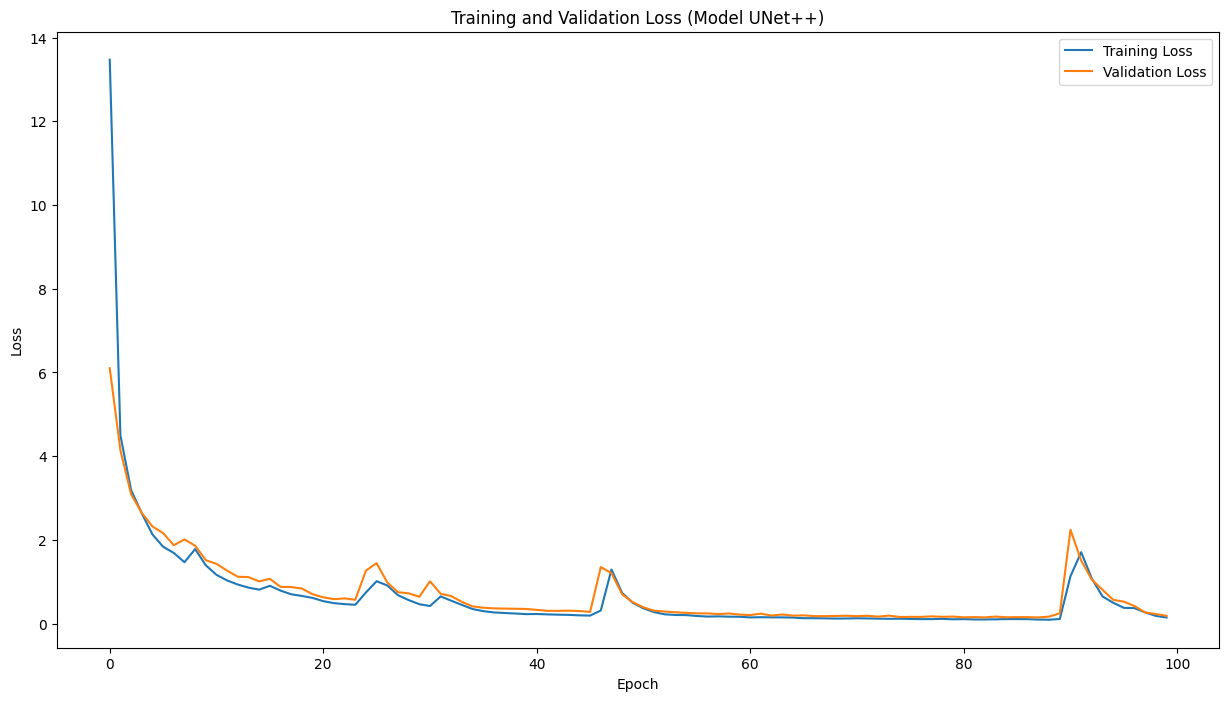

In [ ]:
fig = plt.figure(figsize=(15, 8))

plt.plot(loss_trains, label='Training Loss')
plt.plot(loss_vals, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Model UNet++)')
plt.legend()

In [ ]:
torch.save(model_2.state_dict(), "/content/drive/MyDrive/Segmentation/your_model_u_net_plus_plus.pt")

## Model 3 with DeepLabV3

In [ ]:
model_deeplab = smp.DeepLabV3Plus(encoder_name='resnet50', encoder_weights='imagenet', in_channels=1, classes=1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


In [ ]:
#Defining the loss function -- with optimizer
model_deeplab=model_deeplab.to(DEVICE)
loss_fn= nn.BCEWithLogitsLoss()
lr=0.001
optimizer=torch.optim.Adam(params=model_deeplab.parameters(), lr=lr)
n_epochs = 100

loss_trains = []
loss_vals = []
for i in range(n_epochs):
    print("Epoch No:",i+1)
    loss_train, loss_val=train_one_epoch(train_loader, valid_loader, model_deeplab, loss_fn,optimizer)
    loss_trains.append(loss_train)
    loss_vals.append(loss_val)
    print("--------------------------------------------------")

Epoch No: 1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Batch: 47 || Loss train: 8.63469273597002 || Loss Vaild: 4.503649767488241
--------------------------------------------------
Epoch No: 2
Batch: 47 || Loss train: 3.6931939236819744 || Loss Vaild: 3.578971903771162
--------------------------------------------------
Epoch No: 3
Batch: 47 || Loss train: 3.046401731669903 || Loss Vaild: 3.0559224858880043
--------------------------------------------------
Epoch No: 4
Batch: 47 || Loss train: 2.6385602056980133 || Loss Vaild: 2.9719324093312025
--------------------------------------------------
Epoch No: 5
Batch: 47 || Loss train: 2.364657837897539 || Loss Vaild: 2.5287632178515196
--------------------------------------------------
Epoch No: 6
Batch: 47 || Loss train: 2.144111765548587 || Loss Vaild: 2.4606427252292633
--------------------------------------------------
Epoch No: 7
Batch: 47 || Loss train: 1.9132085889577866 || Loss Vaild: 2.1828091349452734
--------------------------------------------------
Epoch No: 8
Batch: 47 || Loss tr

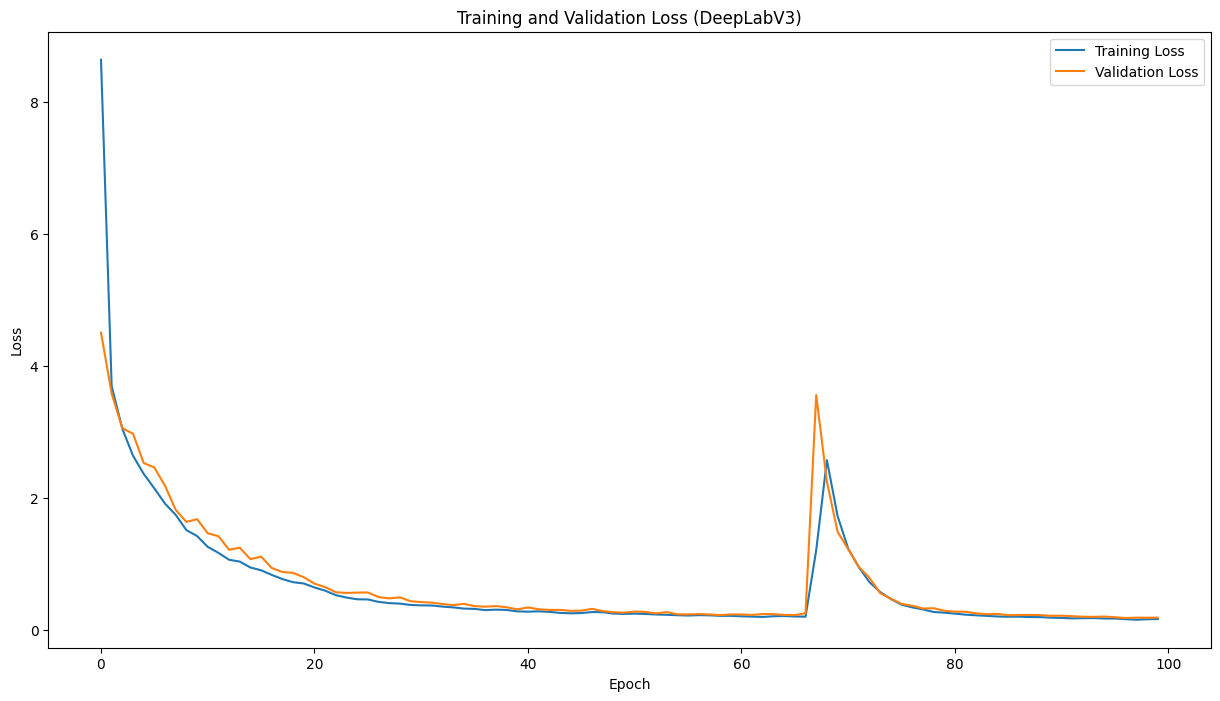

In [ ]:
fig = plt.figure(figsize=(15, 8))

plt.plot(loss_trains, label='Training Loss')
plt.plot(loss_vals, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (DeepLabV3)')
plt.legend()

In [ ]:
# torch.save(model_deeplab, "/content/drive/MyDrive/Segmentation/model_deeplab_v3.pt")

In [ ]:
# true negative "pixels"
root_dir = "/content/drive/MyDrive/Segmentation/segmentation_brain_data/test2"
dataset_test = CustomDataset_general(root_dir, transform=image_transform)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

iou_scores = []
f1_scores = []
f2_scores = []
accuracys = []
recalls = []
for batch, (X, y) in enumerate(test_loader):
    X = X.to(DEVICE, dtype=torch.float32)
    target = y.to(DEVICE, dtype=torch.float32)
    output = model_deeplab(X)
    output = (output > 0.5).float()
    tp, fp, fn, tn = smp.metrics.get_stats(output, target, mode='multilabel', threshold=0.5)

    # then compute metrics with required reduction (see metric docs)
    iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
    f1_score = smp.metrics.f1_score(tp, fp, fn, tn, reduction="micro")
    f2_score = smp.metrics.fbeta_score(tp, fp, fn, tn, beta=2, reduction="micro")
    accuracy = smp.metrics.accuracy(tp, fp, fn, tn, reduction="macro")
    recall = smp.metrics.recall(tp, fp, fn, tn, reduction="micro-imagewise")

    iou_scores.append(iou_score.item())
    f1_scores.append(f1_score.item())
    f2_scores.append(f2_score.item())
    accuracys.append(accuracy.item())

ValueError: Target should be one of the integer types, got torch.float32.

## Model 4

In [ ]:
model_deeplab_plus = smp.DeepLabV3Plus(encoder_name='resnet50', encoder_weights='imagenet', in_channels=1, classes=1)

In [ ]:
#Defining the loss function -- with optimizer
model_deeplab_plus=model_deeplab_plus.to(DEVICE)
loss_fn= nn.BCEWithLogitsLoss()
lr=0.001
optimizer=torch.optim.Adam(params=model_deeplab_plus.parameters(), lr=lr)
n_epochs = 100

loss_trains = []
loss_vals = []
for i in range(n_epochs):
    print("Epoch No:",i+1)
    loss_train, loss_val=train_one_epoch(train_loader, valid_loader, model_deeplab_plus, loss_fn,optimizer)
    loss_trains.append(loss_train)
    loss_vals.append(loss_val)
    print("--------------------------------------------------")

In [ ]:
fig = plt.figure(figsize=(15, 8))

plt.plot(loss_trains, label='Training Loss')
plt.plot(loss_vals, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of DeepLab++')
plt.legend()

In [ ]:
# torch.save(model_deeplab_plus, "/content/drive/MyDrive/Segmentation/model_deeplab_v3_plus_plus.pt")

# visualize result

In [ ]:
root_dir = "/content/drive/MyDrive/Segmentation/segmentation_brain_data/test2"
dataset_test = CustomDataset_general(root_dir, transform=image_transform)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

## Testing with **Deep Lab Model**

In [ ]:
def visualize_input_output_target(input_image, output_image, target_image):
    # Move tensors to CPU memory if they are on CUDA devices
    input_image = input_image.cpu()
    output_image = output_image.cpu()
    target_image = target_image.cpu()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot input image
    axes[0].imshow(input_image.squeeze().numpy(), cmap='gray')
    axes[0].set_title('Input Image')
    axes[0].axis('off')

    # Plot output image (predicted binary mask)
    axes[1].imshow(output_image.squeeze().numpy(), cmap='gray')
    axes[1].set_title('Output Image (Predicted)')
    axes[1].axis('off')

    # Plot target image (ground truth binary mask)
    axes[2].imshow(target_image.squeeze().numpy(), cmap='gray')
    axes[2].set_title('Target Image (Ground Truth)')
    axes[2].axis('off')

    plt.show()
    fig.savefig("output.png")

with torch.inference_mode():
    for batch, (X, y) in enumerate(valid_loader):
        X = X.to(DEVICE, dtype=torch.float32)
        y = y.to(DEVICE, dtype=torch.float32)

        y_pred_logits = model_deeplab(X)

        # Assuming y_pred_logits contains probabilities or logits for each pixel
        # You may need to apply thresholding or other post-processing to get binary images
        # Here, we'll just consider values above 0.5 as foreground (1) and below as background (0)
        y_pred_binary = (y_pred_logits > 0.5).float()

        # Visualize input, output, and target binary images for the first batch
        visualize_input_output_target(X[0], y_pred_binary[0], y[0])

## Testing **DeepLab++**

In [ ]:
with torch.inference_mode():
    for batch, (X, y) in enumerate(valid_loader):
        X = X.to(DEVICE, dtype=torch.float32)
        y = y.to(DEVICE, dtype=torch.float32)

        y_pred_logits = model_deeplab_plus(X)

        # Assuming y_pred_logits contains probabilities or logits for each pixel
        # You may need to apply thresholding or other post-processing to get binary images
        # Here, we'll just consider values above 0.5 as foreground (1) and below as background (0)
        y_pred_binary = (y_pred_logits > 0.5).float()

        # Visualize input, output, and target binary images for the first batch
        visualize_input_output_target(X[0], y_pred_binary[0], y[0])